In [2]:
import matplotlib.pyplot as plt
import astropy.io.fits as ast
import numpy as np
import csv

%matplotlib inline
plt.ion()

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename 

from photutils.datasets import make_4gaussians_image
from photutils import centroid_com, centroid_1dg, centroid_2dg

print("Required Libraries Loaded Successfully")

Required Libraries Loaded Successfully


Filename: OPAL RAWS\Cycle_26\1\MAST_2021-01-20T1027\HST\iduy22kcq - F845M\iduy22kcq_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     794   ()      
  1  SCI           1 ImageHDU        91   (514, 543)   float32   
  2  WHT           1 ImageHDU        47   (514, 543)   float32   
  3  CTX           1 ImageHDU        42   (514, 543)   int32   
  4  HDRTAB        1 BinTableHDU    559   1R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 15A, 4A, 1A, 4A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 1A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A

<Figure size 432x288 with 0 Axes>

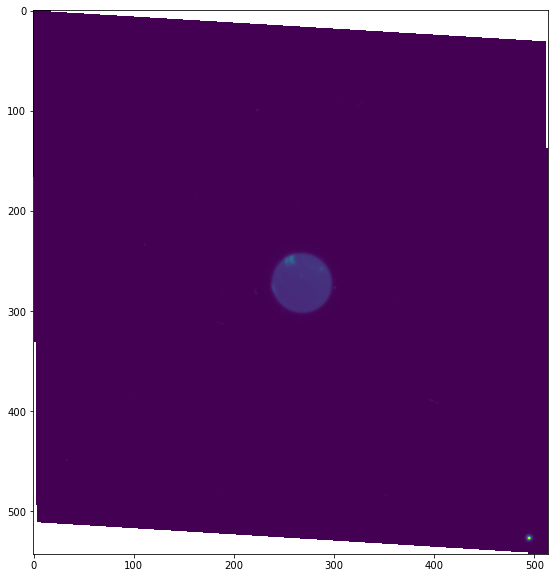

In [57]:
drz = get_pkg_data_filename('OPAL RAWS/Cycle_26/1/MAST_2021-01-20T1027/HST/iduy22kcq - F845M/iduy22kcq_drz.fits')

drzdat = fits.open(drz) #Another way of opening the FITS file
ast.info(drz)

drzim = fits.getdata(drz, ext=1)
bighdr = drzdat[0].header
drzhdr = drzdat[1].header

print()
print(drzhdr['ORIENTAT'])
print(drzhdr['PHOTFLAM'])
print(str(bighdr['DATE-OBS']), str(bighdr['TIME-OBS']))

plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(drzim)
#plt.xlim(225,325)
#plt.ylim(325,225)

#with open('F845Mkcq.csv', 'w', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerows(drzim)

The following cell of code shows an image of an FQ727N filter. This image has been drastically filtered, as there were many negative values in the image, as well as massively anomalously bright pixels. This meant that the contrast in the image was massively reduced. This filtering algorithm in the following image is trial and errored. 

<Figure size 432x288 with 0 Axes>

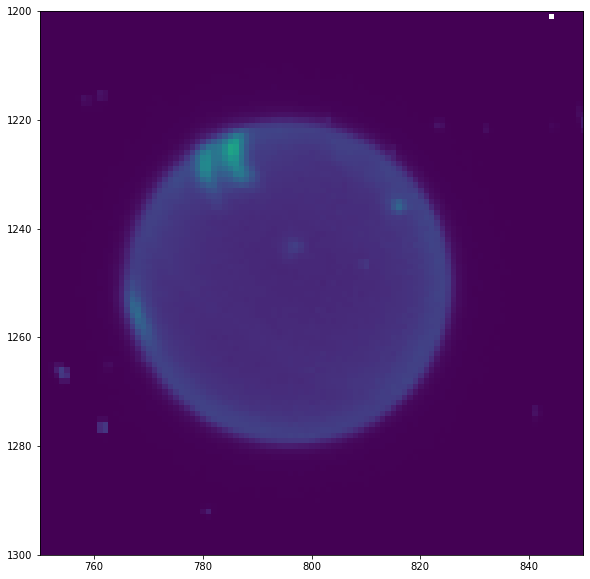

In [8]:
drz = get_pkg_data_filename('OPAL RAWS/Cycle_26/1/FQ727N/727_1_drz.fits')

#drzdat = fits.open(drz) #Another way of opening the FITS file
#ast.info(drz)

drzim = fits.getdata(drz, ext=1)
resolution = drzim.shape

for i in range(resolution[0]):
    for j in range(resolution[1]):
        if drzim[i][j] < 0:
            drzim[i][j] = np.nan
        if drzim[i][j] > 100:
            drzim[i][j] = np.nan

#print(np.nan)
#print(np.max(drzim))
#print(np.min(drzim))

plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(drzim)
plt.xlim(750,850)
plt.ylim(1300,1200)

with open('FQ727N22khq.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(drzim)

Filename: OPAL RAWS\Cycle_26\1\MAST_2021-01-20T1027\HST\MAST_2021-01-20T1544\HST\iduy22kjq\iduy22kjq_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     238   ()      
  1  SCI           1 ImageHDU        92   (2070, 2050)   int16 (rescales to uint16)   
  2  ERR           1 ImageHDU        44   ()      
  3  DQ            1 ImageHDU        38   ()      
44624


<Figure size 432x288 with 0 Axes>

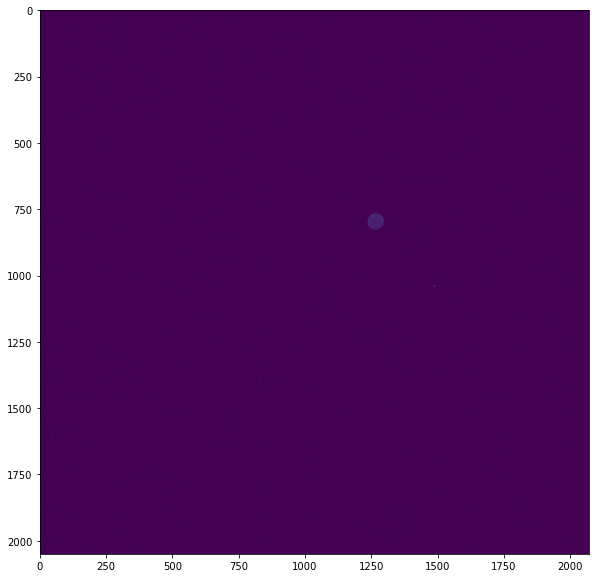

<Figure size 432x288 with 0 Axes>

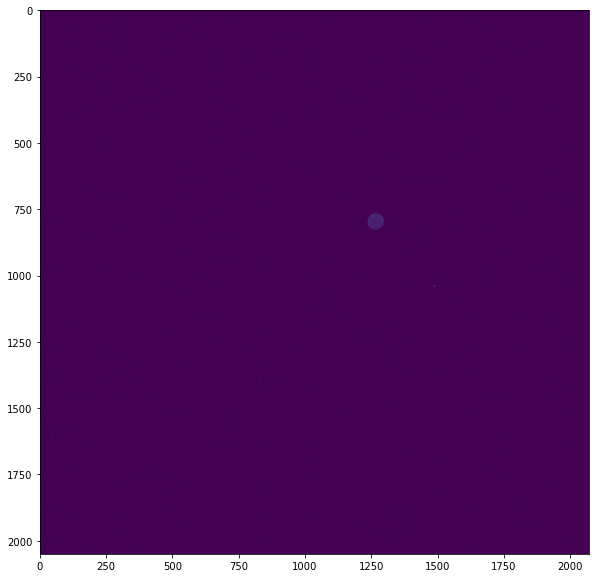

In [55]:
raw = get_pkg_data_filename('OPAL RAWS/Cycle_26/1/MAST_2021-01-20T1027/HST/MAST_2021-01-20T1544/HST/iduy22kjq/iduy22kjq_raw.fits')

rawdat = fits.open(raw) #Another way of opening the FITS file
ast.info(raw)
rawhdr = rawdat[1].header
#print(rawhdr)

rawim0 = fits.getdata(raw, ext=0)
plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(rawim0)

rawim1 = fits.getdata(raw, ext=1)
plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(rawim1)
print(np.max(rawim1))

# Finding the Planicentre
The block of code below shows the initial iterative process that my data uses to find the planicentre. By determining a "centre of mass" of the image, the rough location of the planetary disc can be found.

This is not perfect however, as the COM estimate is thrown off by other features of the image, and the disc. Therefore an iterative process is used to cut out un-necessary information from the image, for example the prescence of Triton in the F845M images. Once this iterative process is completed, the COM estimate is still thrown off by the presence of the storms/cloud features on the planetary surface.

-70.00057736856226
2019-09-28 07:42:48
guess1: [1111, 2092]
guess2: [1111, 2092]
guess3: [2040, 1097]


C:\ProgramData\Anaconda3\lib\site-packages\photutils\centroids\core.py:74: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.sum(indices[axis] * data) / total / oversampling[axis]


ValueError: cannot convert float NaN to integer

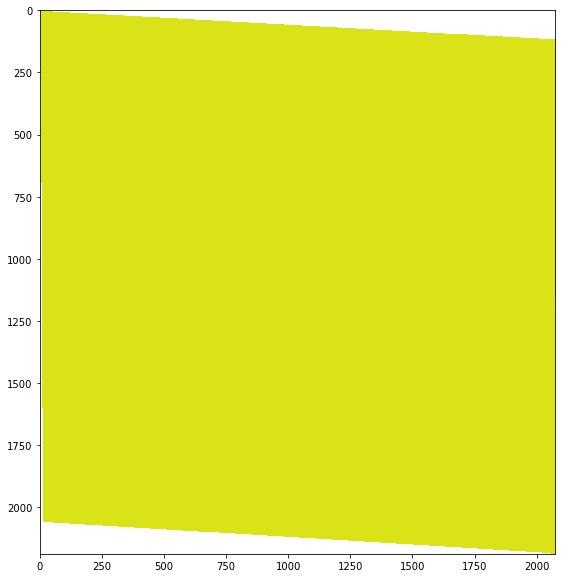

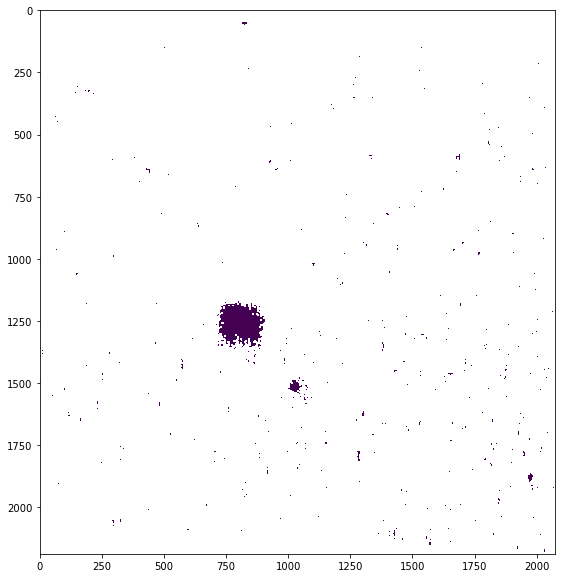

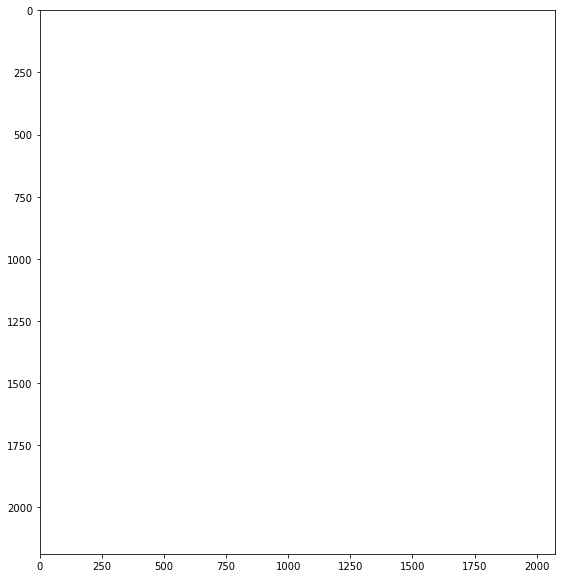

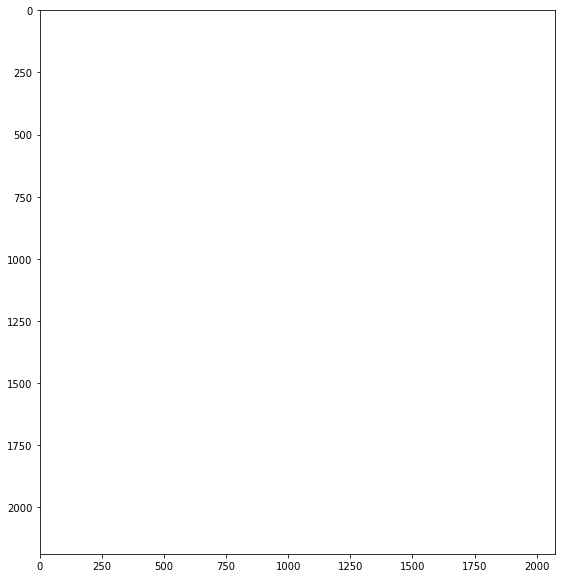

In [7]:
drz = get_pkg_data_filename('OPAL RAWS/Cycle_26/1/FQ727N/727_1_drz.fits')

drzdat = fits.open(drz) #Another way of opening the FITS file
#ast.info(drz)

drzim = fits.getdata(drz, ext=1)
bighdr = drzdat[0].header #reads header of the fits file
drzhdr = drzdat[1].header #reads header of the .sci data extension of the image file
resolution = drzdat[1].shape

planicentre = [0,0] #initialises the planicentre

#print()
print(drzhdr['ORIENTAT'])
#print(drzhdr['PHOTFLAM'])
print(str(bighdr['DATE-OBS']), str(bighdr['TIME-OBS']))

plt.figure(figsize=(10,10))
plt.imshow(drzim)

for i in range(resolution[0]):
    for j in range(resolution[1]):
        if drzim[i][j] < 0:
            drzim[i][j] = np.nan

plt.figure(figsize=(10,10))
plt.imshow(drzim)          
            
planicentre1 = centroid_com(drzim)
planicentre[0] = round(planicentre1[0])
planicentre[1] = round(planicentre1[1])
print('guess1:', str(planicentre))

for i in range(resolution[0]):
    for j in range(resolution[1]):
        if i not in range(planicentre[0]-100, planicentre[0]+100):
            drzim[i][j] = np.nan
        if j not in range(planicentre[1]-100, planicentre[1]+100):
            drzim[i][j] = np.nan       
            
planicentre2 = centroid_com(drzim)
#planicentre[0] = round(planicentre2[0])
#planicentre[1] = round(planicentre2[1])
print('guess2:', str(planicentre))

plt.figure(figsize=(10,10))
plt.imshow(drzim)
#plt.ylim(planicentre2[1]+100, planicentre2[1]-100)
#plt.xlim(planicentre2[0]-100, planicentre2[0]+100) 

for i in range(resolution[0]):
    for j in range(resolution[1]):
        if i not in range(planicentre[0]-75, planicentre[0]+75):
            drzim[i][j] = np.nan
        if j not in range(planicentre[1]-75, planicentre[1]+75):
            drzim[i][j] = np.nan

planicentre3 = centroid_com(drzim)
planicentre[0] = round(planicentre3[0])
planicentre[1] = round(planicentre3[1])
print('guess3:', str(planicentre))

plt.figure(figsize=(10,10))
plt.imshow(drzim)
#plt.ylim(planicentre3[1]+75, planicentre3[1]-75)
#plt.xlim(planicentre3[0]-75, planicentre3[0]+75)

for i in range(resolution[0]):
    for j in range(resolution[1]):
        if i not in range(planicentre[0]-50, planicentre[0]+50):
            drzim[i][j] = np.nan
        if j not in range(planicentre[1]-50, planicentre[1]+50):
            drzim[i][j] = np.nan

planicentre4 = centroid_com(drzim)
planicentre[0] = round(planicentre4[0])
planicentre[1] = round(planicentre4[1])
print('guess4:', str(planicentre))

plt.figure(figsize=(10,10))
plt.imshow(drzim)
plt.ylim(planicentre4[1]+50, planicentre4[1]-50)
plt.xlim(planicentre4[0]-50, planicentre4[0]+50)

a = np.where(np.isnan(drzim), 0, drzim)

plt.figure()
plt.imshow(a)


